In [1]:
import pandas as pd
pd.options.display.max_columns=200
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats as st
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [2]:
data = pd.read_csv('data_clean.csv')

In [3]:
data

,url,product_name,brands,pnns_groups_1,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,proteins_100g,salt_100g,sodium_100g
0,http://world-fr.openfoodfacts.org/produit/3396...,Chocolat Noir Costa Rica 75% De Cacao,Bonneterre,Sugary snacks,556.0,44.0,27.000000,30.000000,24.000000,10.000000,0.030000,0.011811
1,http://world-fr.openfoodfacts.org/produit/3263...,Dégustation Lait,Franprix,Sugary snacks,572.4,38.0,22.000000,50.000000,49.000000,7.600000,0.190000,0.074803
2,http://world-fr.openfoodfacts.org/produit/8410...,Biscuits Petit-Déjeuner Céréales Complètes San...,Gullon,Sugary snacks,413.2,14.0,1.300000,65.000000,1.400000,6.800000,0.650000,0.255906
3,http://world-fr.openfoodfacts.org/produit/2404...,Galletas Tostadas,Aurada,Sugary snacks,425.6,10.0,5.000000,77.000000,21.000000,6.900000,0.780000,0.307087
4,http://world-fr.openfoodfacts.org/produit/8430...,Galletas Tostadas,SuperSol,Sugary snacks,425.6,10.0,5.000000,77.000000,21.000000,6.900000,0.780000,0.307087
...,...,...,...,...,...,...,...,...,...,...,...,...
231060,http://world-fr.openfoodfacts.org/produit/4005...,Pâté Shiitake,Tartex,Fruits and vegetables,214.7,17.9,4.749687,6.400000,16.592037,7.000000,1.267303,0.498955
231061,http://world-fr.openfoodfacts.org/produit/7520...,Coriandre Gourmet Garden,Gourmet Garden,Sugary snacks,10.0,0.3,4.749687,33.922107,16.592037,7.099545,0.127000,0.050000
231062,http://world-fr.openfoodfacts.org/produit/5601...,Spaghetti classica,Nacional,Cereals and potatoes,348.2,1.8,0.400000,71.000000,5.000000,12.000000,0.010160,0.004000
231063,http://world-fr.openfoodfacts.org/produit/5601...,Soupe de queue de boeuf (potage oxtail),Maggi,Composite foods,366.3,11.9,0.500000,51.800000,7.200000,13.000000,14.732000,5.800000


# Analyse univariée

## Variable qualitative 

In [4]:
data['pnns_groups_1'].value_counts()

Sugary snacks              49822
Cereals and potatoes       35448
Milk and dairy products    27799
Composite foods            24173
Beverages                  22524
Fat and sauces             18333
Fish Meat Eggs             16658
Salty snacks               16500
Fruits and vegetables      16126
fruits-and-vegetables       2461
sugary-snacks               1188
cereals-and-potatoes          32
salty-snacks                   1
Name: pnns_groups_1, dtype: int64

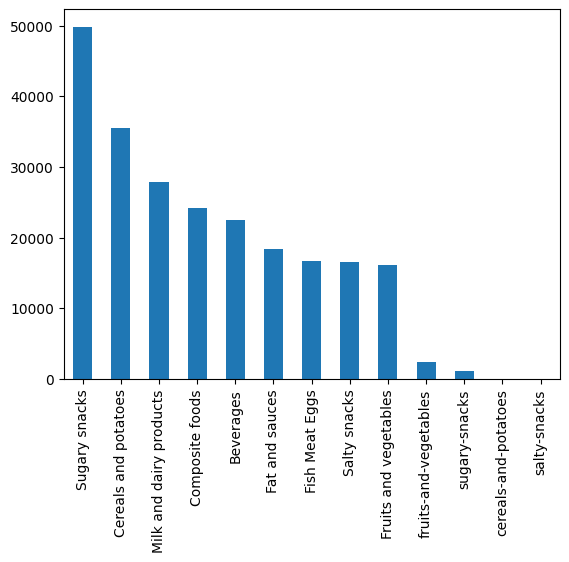

In [5]:
data['pnns_groups_1'].value_counts().plot.bar()
plt.show()

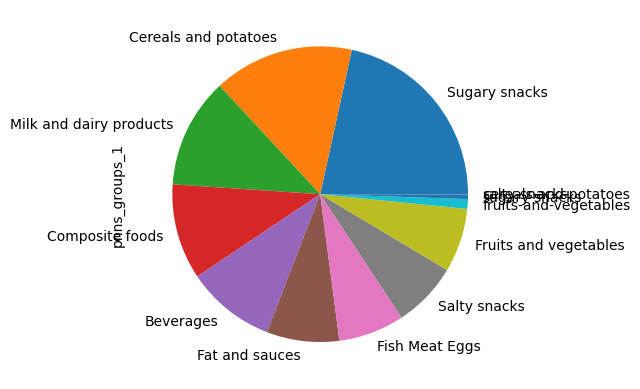

In [6]:
data['pnns_groups_1'].value_counts().plot.pie()
plt.show()

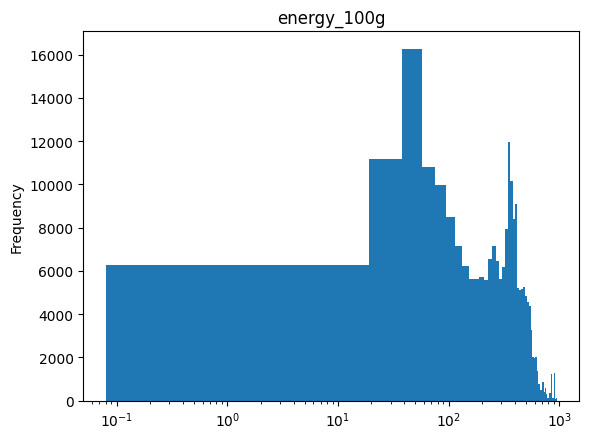

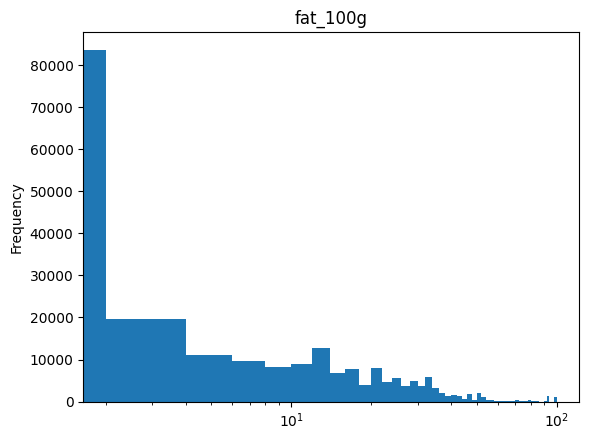

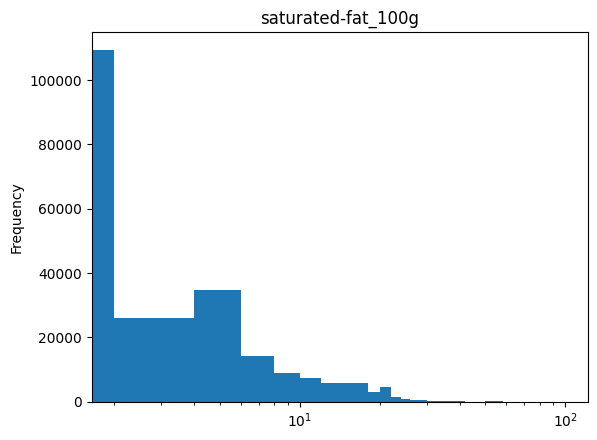

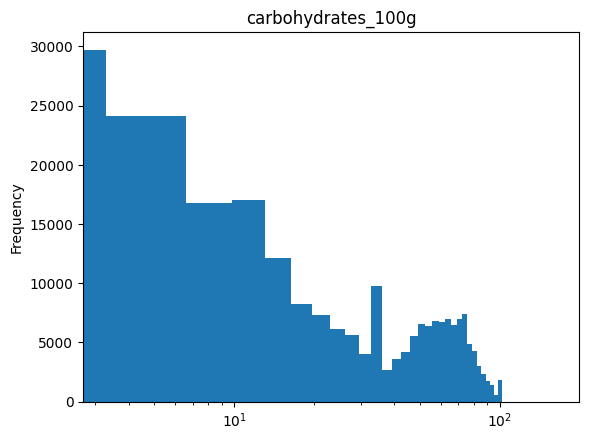

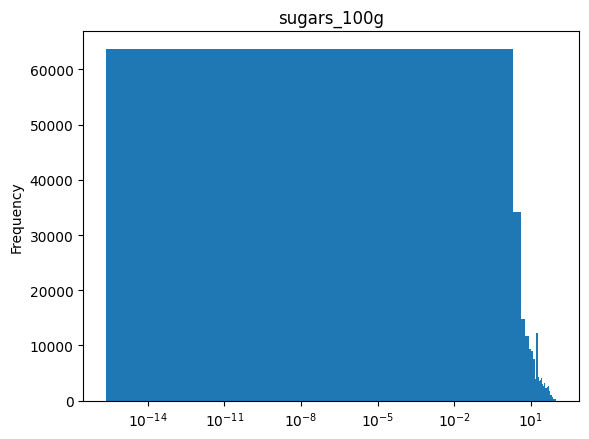

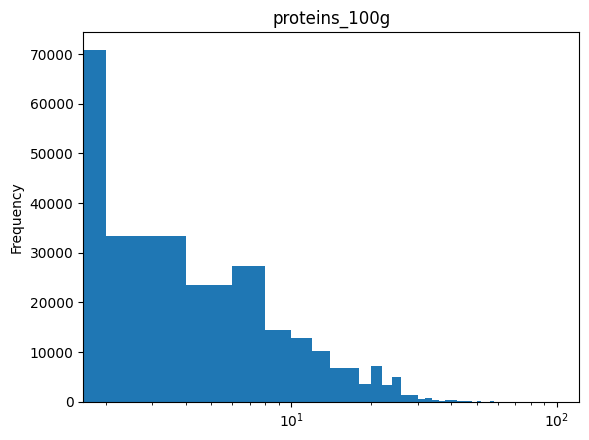

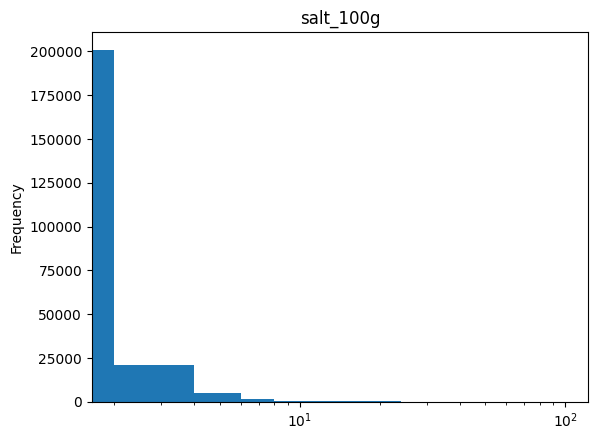

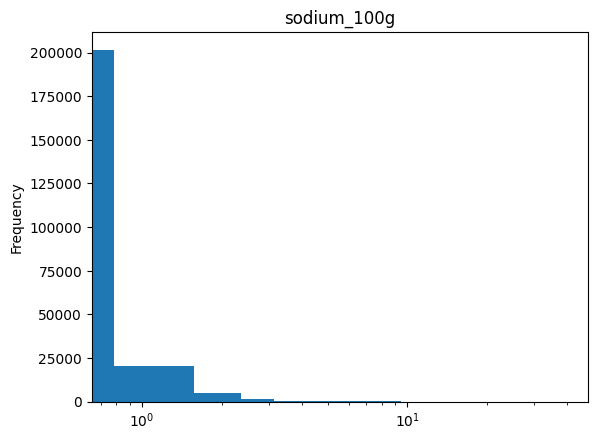

In [23]:
for col in ['energy_100g', 'fat_100g', 'saturated-fat_100g', 'carbohydrates_100g','sugars_100g', 'proteins_100g', 'salt_100g', 'sodium_100g']:
   # Tracer un histogramme avec une échelle logarithmique
   data[col].plot.hist(bins=50, logx=True)
   plt.title(col)
   plt.show()


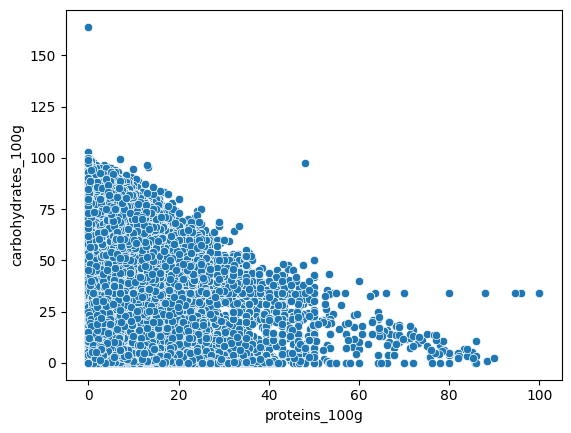

In [24]:
sns.scatterplot(x='proteins_100g', y='carbohydrates_100g', data=data)
plt.show()

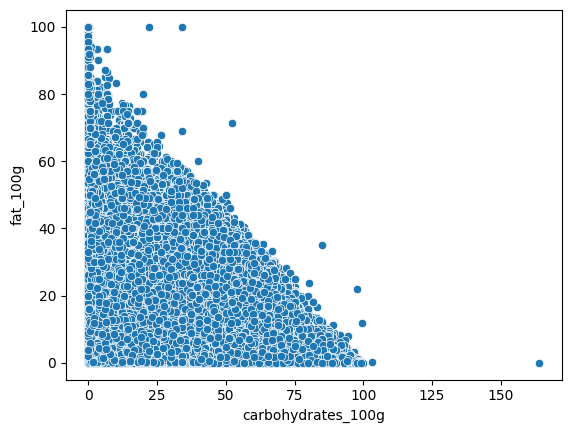

In [25]:
sns.scatterplot(x='carbohydrates_100g', y='fat_100g', data=data)
plt.show()

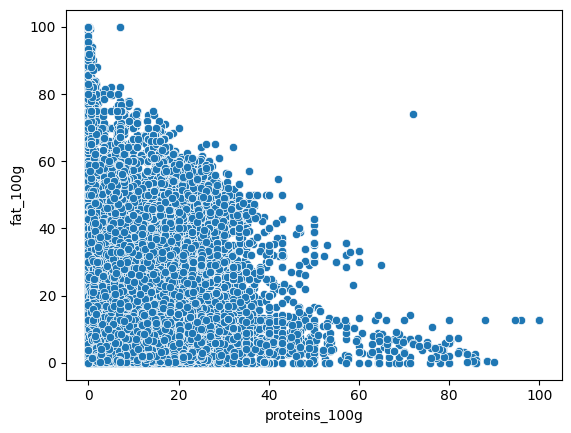

In [26]:
sns.scatterplot(x='proteins_100g', y='fat_100g', data=data)
plt.show()

In [30]:
data.columns

Index(['url', 'product_name', 'brands', 'pnns_groups_1', 'energy_100g',
       'fat_100g', 'saturated-fat_100g', 'carbohydrates_100g', 'sugars_100g',
       'proteins_100g', 'salt_100g', 'sodium_100g'],
      dtype='object')

In [37]:
df=data.drop(labels = ['url','product_name','brands','pnns_groups_1'], axis = 1)

In [38]:
df.corr()

,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,proteins_100g,salt_100g,sodium_100g
energy_100g,1.000000,0.758188,0.518727,0.461966,0.280678,0.269291,-0.003366,-0.003364
fat_100g,0.758188,1.000000,0.674776,-0.123685,-0.056967,0.217157,-0.007110,-0.007108
saturated-fat_100g,0.518727,0.674776,1.000000,-0.063921,0.092331,0.157088,-0.003983,-0.003985
carbohydrates_100g,0.461966,-0.123685,-0.063921,1.000000,0.655621,-0.126921,-0.032204,-0.032203
sugars_100g,0.280678,-0.056967,0.092331,0.655621,1.000000,-0.280047,-0.093893,-0.093893
proteins_100g,0.269291,0.217157,0.157088,-0.126921,-0.280047,1.000000,0.102057,0.102066
salt_100g,-0.003366,-0.007110,-0.003983,-0.032204,-0.093893,0.102057,1.000000,0.999998
sodium_100g,-0.003364,-0.007108,-0.003985,-0.032203,-0.093893,0.102066,0.999998,1.000000


<AxesSubplot: >

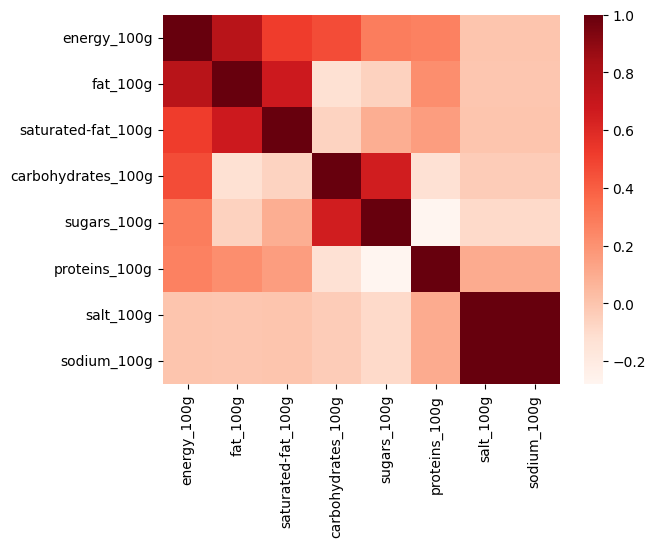

In [40]:
sns.heatmap(df.corr(), cmap="Reds")

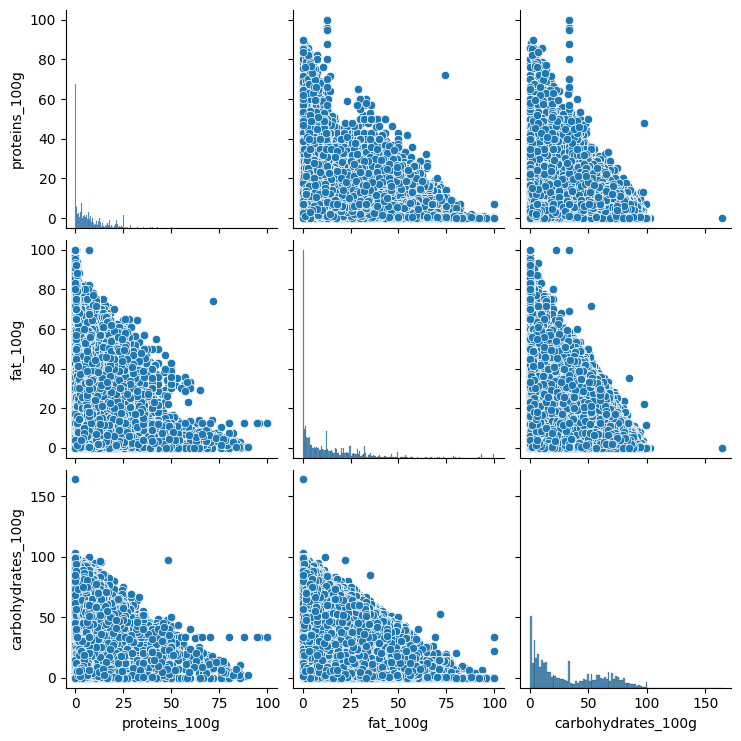

In [34]:
df = data[['proteins_100g', 'fat_100g', 'carbohydrates_100g']]

# Tracer un pairplot des colonnes sélectionnées
sns.pairplot(df)
plt.show()

In [56]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Sélection des colonnes quantitatives
X = data.iloc[:, 4:]

# Normalisation des données
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)
X_scaled = scaler.fit_transform(X)

In [79]:
idx = ["mean", "std"]

pd.DataFrame(X_scaled).describe().round(2).loc[idx, :]

,0,1,2,3,4,5,6,7
mean,0.0,-0.0,-0.0,0.0,0.0,-0.0,0.0,0.0
std,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [139]:
n_components = 6

pca = PCA(n_components=n_components)

pca.fit(X_scaled)

PCA(n_components=6)

In [140]:
pca.explained_variance_ratio_

array([0.30564735, 0.26425383, 0.22100141, 0.1113891 , 0.05866217,
       0.03405415])

In [141]:
scree = (pca.explained_variance_ratio_*100).round(2)
scree

array([30.56, 26.43, 22.1 , 11.14,  5.87,  3.41])

In [142]:
scree_cum = scree.cumsum().round()
scree_cum

array([ 31.,  57.,  79.,  90.,  96., 100.])

In [143]:
x_list = range(1, n_components+1)
list(x_list)

[1, 2, 3, 4, 5, 6]

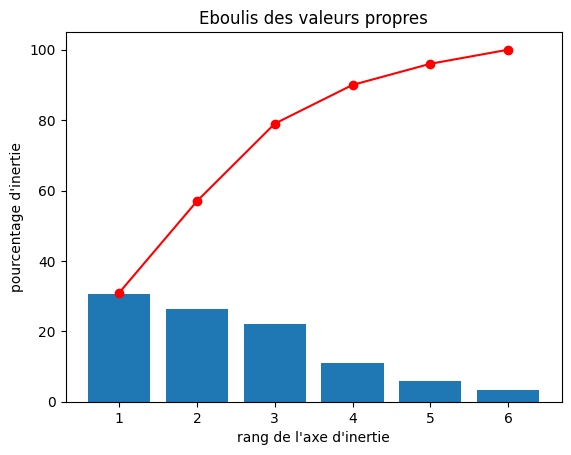

In [144]:
plt.bar(x_list, scree)
plt.plot(x_list, scree_cum,c="red",marker='o')
plt.xlabel("rang de l'axe d'inertie")
plt.ylabel("pourcentage d'inertie")
plt.title("Eboulis des valeurs propres")
plt.show(block=False)

In [145]:
pcs = pca.components_
pcs

array([[ 5.93848692e-01,  5.48621001e-01,  4.93463118e-01,
         1.84200585e-01,  1.74353947e-01,  1.93462255e-01,
        -2.34108915e-02, -2.34096378e-02],
       [-2.81292048e-02,  1.25083905e-01,  8.33046110e-02,
        -2.98206853e-01, -3.46914640e-01,  2.58935261e-01,
         5.91733713e-01,  5.91734532e-01],
       [ 1.15192626e-01, -2.22161789e-01, -1.54020475e-01,
         5.59860410e-01,  5.10023510e-01, -2.31863285e-01,
         3.78367969e-01,  3.78367453e-01],
       [ 1.64519189e-01, -2.17802767e-01, -3.67453117e-01,
         3.06904950e-01, -9.21873498e-02,  8.22187855e-01,
        -7.67887442e-02, -7.67793064e-02],
       [-3.86490594e-01, -3.30628617e-01,  5.83238298e-01,
        -1.77198941e-01,  4.82036609e-01,  3.70653389e-01,
         2.58724401e-04,  2.59399829e-04],
       [-2.02407336e-02, -3.65544658e-01,  4.99482007e-01,
         5.02479896e-01, -5.89575458e-01, -1.26143355e-01,
        -1.56117205e-02, -1.56205551e-02]])

In [146]:
pcs = pd.DataFrame(pcs)
pcs

,0,1,2,3,4,5,6,7
0,0.593849,0.548621,0.493463,0.184201,0.174354,0.193462,-0.023411,-0.023410
1,-0.028129,0.125084,0.083305,-0.298207,-0.346915,0.258935,0.591734,0.591735
2,0.115193,-0.222162,-0.154020,0.559860,0.510024,-0.231863,0.378368,0.378367
3,0.164519,-0.217803,-0.367453,0.306905,-0.092187,0.822188,-0.076789,-0.076779
4,-0.386491,-0.330629,0.583238,-0.177199,0.482037,0.370653,0.000259,0.000259
5,-0.020241,-0.365545,0.499482,0.502480,-0.589575,-0.126143,-0.015612,-0.015621


In [147]:
pcs.columns

RangeIndex(start=0, stop=8, step=1)

In [148]:
features = X.columns

In [149]:
pcs.columns = features
pcs.index = [f"F{i}" for i in x_list]
pcs.round(2)

,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,proteins_100g,salt_100g,sodium_100g
F1,0.59,0.55,0.49,0.18,0.17,0.19,-0.02,-0.02
F2,-0.03,0.13,0.08,-0.30,-0.35,0.26,0.59,0.59
F3,0.12,-0.22,-0.15,0.56,0.51,-0.23,0.38,0.38
F4,0.16,-0.22,-0.37,0.31,-0.09,0.82,-0.08,-0.08
F5,-0.39,-0.33,0.58,-0.18,0.48,0.37,0.00,0.00
F6,-0.02,-0.37,0.50,0.50,-0.59,-0.13,-0.02,-0.02


In [150]:
pcs.T

,F1,F2,F3,F4,F5,F6
energy_100g,0.593849,-0.028129,0.115193,0.164519,-0.386491,-0.020241
fat_100g,0.548621,0.125084,-0.222162,-0.217803,-0.330629,-0.365545
saturated-fat_100g,0.493463,0.083305,-0.154020,-0.367453,0.583238,0.499482
carbohydrates_100g,0.184201,-0.298207,0.559860,0.306905,-0.177199,0.502480
sugars_100g,0.174354,-0.346915,0.510024,-0.092187,0.482037,-0.589575
proteins_100g,0.193462,0.258935,-0.231863,0.822188,0.370653,-0.126143
salt_100g,-0.023411,0.591734,0.378368,-0.076789,0.000259,-0.015612
sodium_100g,-0.023410,0.591735,0.378367,-0.076779,0.000259,-0.015621


<AxesSubplot: >

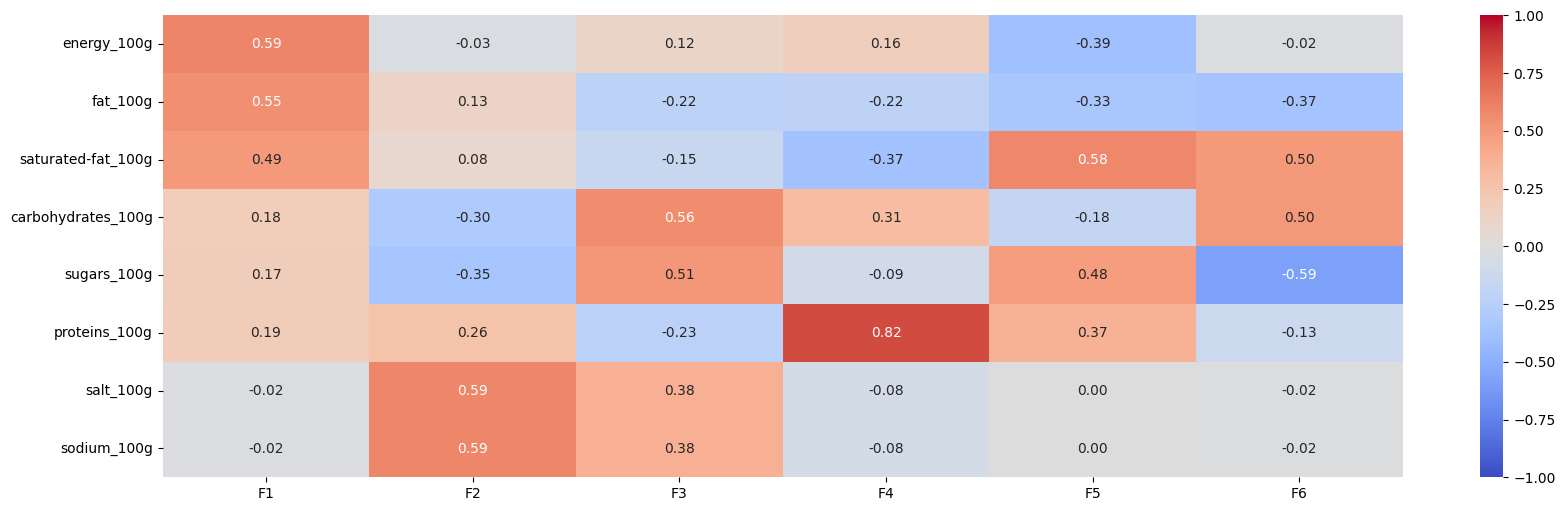

In [151]:
fig, ax = plt.subplots(figsize=(20, 6))
sns.heatmap(pcs.T, vmin=-1, vmax=1, annot=True, cmap="coolwarm", fmt="0.2f")

In [152]:
x, y = 0,1

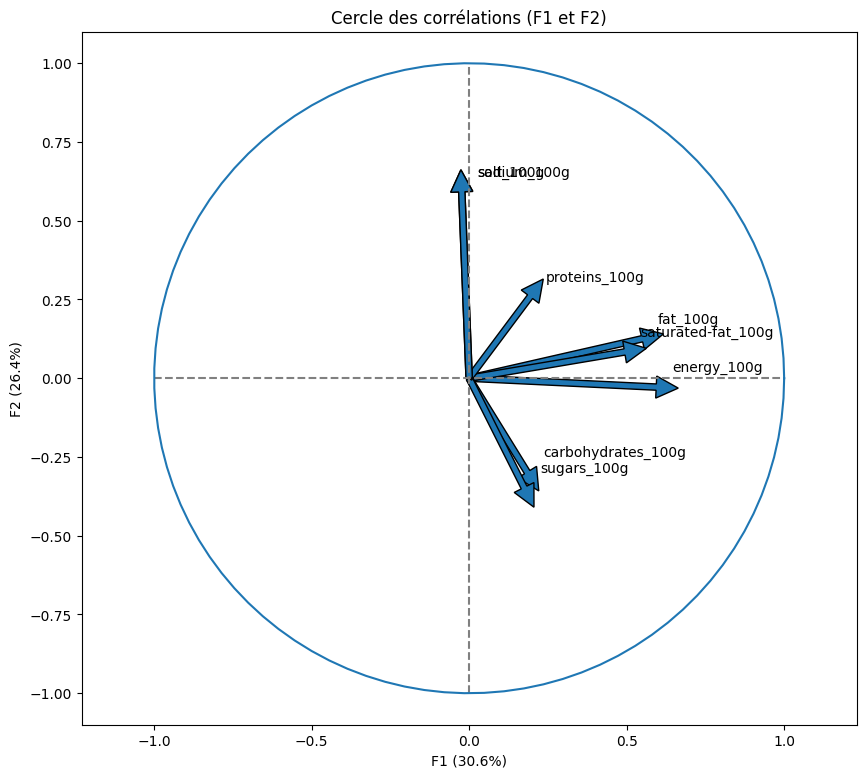

In [153]:
fig, ax = plt.subplots(figsize=(10, 9))
for i in range(0, pca.components_.shape[1]):
    ax.arrow(0,
             0,  # Start the arrow at the origin
             pca.components_[0, i],  #0 for PC1
             pca.components_[1, i],  #1 for PC2
             head_width=0.07,
             head_length=0.07, 
             width=0.02,              )

    plt.text(pca.components_[0, i] + 0.05,
             pca.components_[1, i] + 0.05,
             features[i])
    
# affichage des lignes horizontales et verticales
plt.plot([-1, 1], [0, 0], color='grey', ls='--')
plt.plot([0, 0], [-1, 1], color='grey', ls='--')


# nom des axes, avec le pourcentage d'inertie expliqué
plt.xlabel('F{} ({}%)'.format(x+1, round(100*pca.explained_variance_ratio_[x],1)))
plt.ylabel('F{} ({}%)'.format(y+1, round(100*pca.explained_variance_ratio_[y],1)))

plt.title("Cercle des corrélations (F{} et F{})".format(x+1, y+1))


an = np.linspace(0, 2 * np.pi, 100)
plt.plot(np.cos(an), np.sin(an))  # Add a unit circle for scale
plt.axis('equal')
plt.show(block=False)

In [154]:
def correlation_graph(pca, 
                      x_y, 
                      features) : 
    """Affiche le graphe des correlations

    Positional arguments : 
    -----------------------------------
    pca : sklearn.decomposition.PCA : notre objet PCA qui a été fit
    x_y : list ou tuple : le couple x,y des plans à afficher, exemple [0,1] pour F1, F2
    features : list ou tuple : la liste des features (ie des dimensions) à représenter
    """

    # Extrait x et y 
    x,y=x_y

    # Taille de l'image (en inches)
    fig, ax = plt.subplots(figsize=(10, 9))

    # Pour chaque composante : 
    for i in range(0, pca.components_.shape[1]):

        # Les flèches
        ax.arrow(0,0, 
                pca.components_[x, i],  
                pca.components_[y, i],  
                head_width=0.07,
                head_length=0.07, 
                width=0.02, )

        # Les labels
        plt.text(pca.components_[x, i] + 0.05,
                pca.components_[y, i] + 0.05,
                features[i])
        
    # Affichage des lignes horizontales et verticales
    plt.plot([-1, 1], [0, 0], color='grey', ls='--')
    plt.plot([0, 0], [-1, 1], color='grey', ls='--')

    # Nom des axes, avec le pourcentage d'inertie expliqué
    plt.xlabel('F{} ({}%)'.format(x+1, round(100*pca.explained_variance_ratio_[x],1)))
    plt.ylabel('F{} ({}%)'.format(y+1, round(100*pca.explained_variance_ratio_[y],1)))

    # J'ai copié collé le code sans le lire
    plt.title("Cercle des corrélations (F{} et F{})".format(x+1, y+1))

    # Le cercle 
    an = np.linspace(0, 2 * np.pi, 100)
    plt.plot(np.cos(an), np.sin(an))  # Add a unit circle for scale

    # Axes et display
    plt.axis('equal')
    plt.show(block=False)

In [155]:
x_y = (0,1)

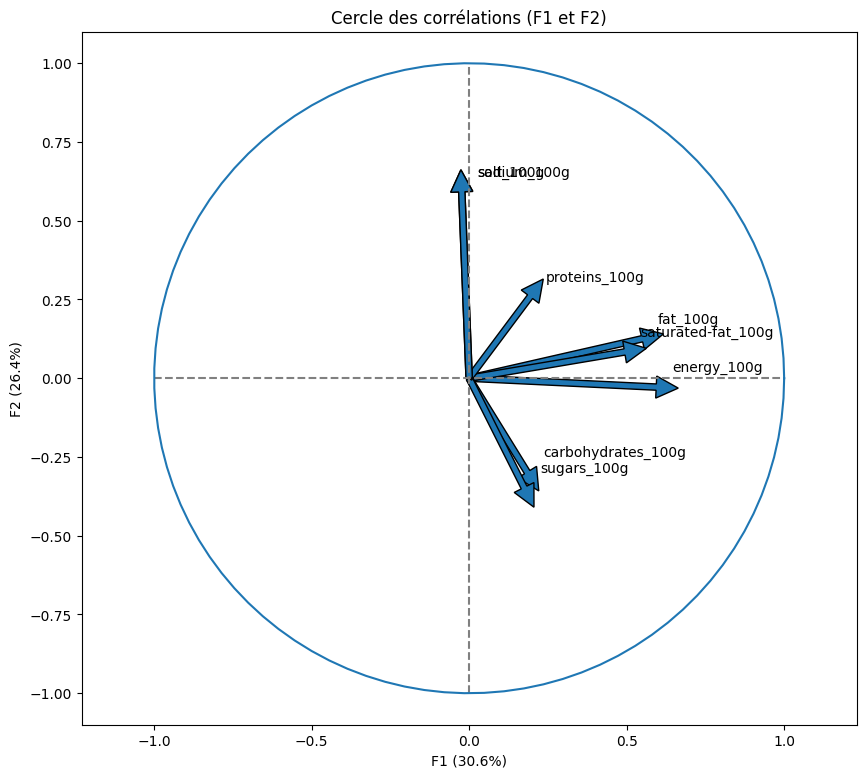

In [156]:
correlation_graph(pca, x_y, features)

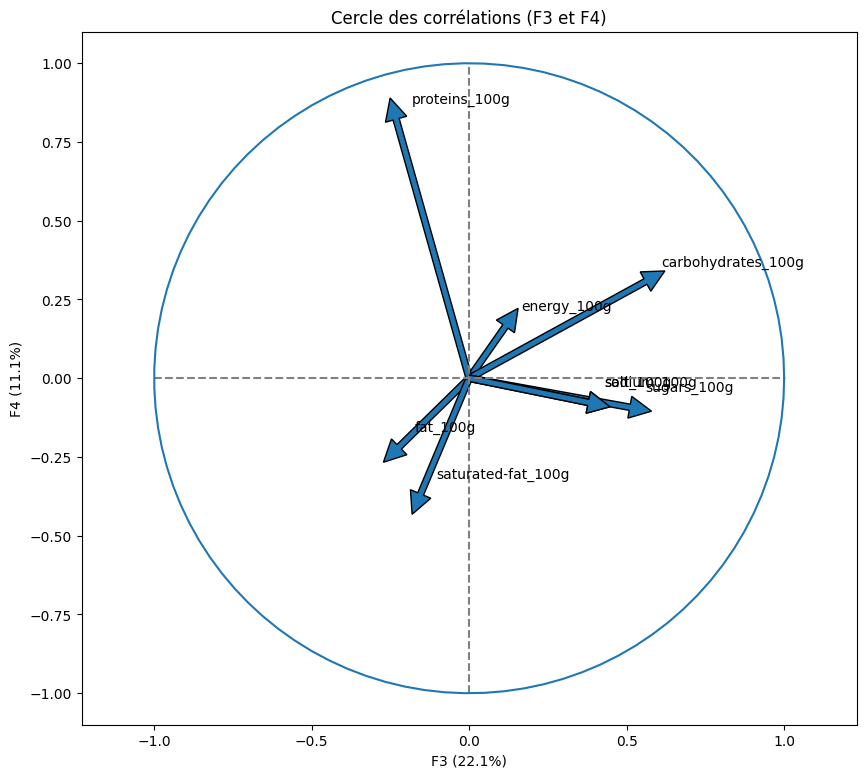

In [157]:
correlation_graph(pca, (2,3), features)

In [158]:
X_proj = pca.transform(X_scaled)
X_proj[:5]

array([[ 3.51641193, -0.02104583, -0.91827635, -1.01295808,  0.98607195,
         0.52933991],
       [ 3.31551287, -0.78175652,  0.41312307, -0.81793778,  1.02035866,
        -0.02730887],
       [ 0.29016751, -0.36675616,  0.30999238,  0.68708395, -1.14331552,
         0.72249661],
       [ 0.70224468, -0.76432041,  1.05107554,  0.60433353, -0.39403767,
         0.70482898],
       [ 0.70224468, -0.76432041,  1.05107554,  0.60433353, -0.39403767,
         0.70482898]])

In [159]:
def display_factorial_planes(   X_projected, 
                                x_y, 
                                pca=None, 
                                labels = None,
                                clusters=None, 
                                alpha=1,
                                figsize=[10,8], 
                                marker="." ):
    """
    Affiche la projection des individus

    Positional arguments : 
    -------------------------------------
    X_projected : np.array, pd.DataFrame, list of list : la matrice des points projetés
    x_y : list ou tuple : le couple x,y des plans à afficher, exemple [0,1] pour F1, F2

    Optional arguments : 
    -------------------------------------
    pca : sklearn.decomposition.PCA : un objet PCA qui a été fit, cela nous permettra d'afficher la variance de chaque composante, default = None
    labels : list ou tuple : les labels des individus à projeter, default = None
    clusters : list ou tuple : la liste des clusters auquel appartient chaque individu, default = None
    alpha : float in [0,1] : paramètre de transparence, 0=100% transparent, 1=0% transparent, default = 1
    figsize : list ou tuple : couple width, height qui définit la taille de la figure en inches, default = [10,8] 
    marker : str : le type de marker utilisé pour représenter les individus, points croix etc etc, default = "."
    """

    # Transforme X_projected en np.array
    X_ = np.array(X_projected)

    # On définit la forme de la figure si elle n'a pas été donnée
    if not figsize: 
        figsize = (7,6)

    # On gère les labels
    if  labels is None : 
        labels = []
    try : 
        len(labels)
    except Exception as e : 
        raise e

    # On vérifie la variable axis 
    if not len(x_y) ==2 : 
        raise AttributeError("2 axes sont demandées")   
    if max(x_y )>= X_.shape[1] : 
        raise AttributeError("la variable axis n'est pas bonne")   

    # on définit x et y 
    x, y = x_y

    # Initialisation de la figure       
    fig, ax = plt.subplots(1, 1, figsize=figsize)

    # On vérifie s'il y a des clusters ou non
    c = None if clusters is None else clusters
 
    # Les points    
    # plt.scatter(   X_[:, x], X_[:, y], alpha=alpha, 
    #                     c=c, cmap="Set1", marker=marker)
    sns.scatterplot(data=None, x=X_[:, x], y=X_[:, y], hue=c)

    # Si la variable pca a été fournie, on peut calculer le % de variance de chaque axe 
    if pca : 
        v1 = str(round(100*pca.explained_variance_ratio_[x]))  + " %"
        v2 = str(round(100*pca.explained_variance_ratio_[y]))  + " %"
    else : 
        v1=v2= ''

    # Nom des axes, avec le pourcentage d'inertie expliqué
    ax.set_xlabel(f'F{x+1} {v1}')
    ax.set_ylabel(f'F{y+1} {v2}')

    # Valeur x max et y max
    x_max = np.abs(X_[:, x]).max() *1.1
    y_max = np.abs(X_[:, y]).max() *1.1

    # On borne x et y 
    ax.set_xlim(left=-x_max, right=x_max)
    ax.set_ylim(bottom= -y_max, top=y_max)

    # Affichage des lignes horizontales et verticales
    plt.plot([-x_max, x_max], [0, 0], color='grey', alpha=0.8)
    plt.plot([0,0], [-y_max, y_max], color='grey', alpha=0.8)

    # Affichage des labels des points
    if len(labels) : 
        # j'ai copié collé la fonction sans la lire
        for i,(_x,_y) in enumerate(X_[:,[x,y]]):
            plt.text(_x, _y+0.05, labels[i], fontsize='14', ha='center',va='center') 

    # Titre et display
    plt.title(f"Projection des individus (sur F{x+1} et F{y+1})")
    plt.show()

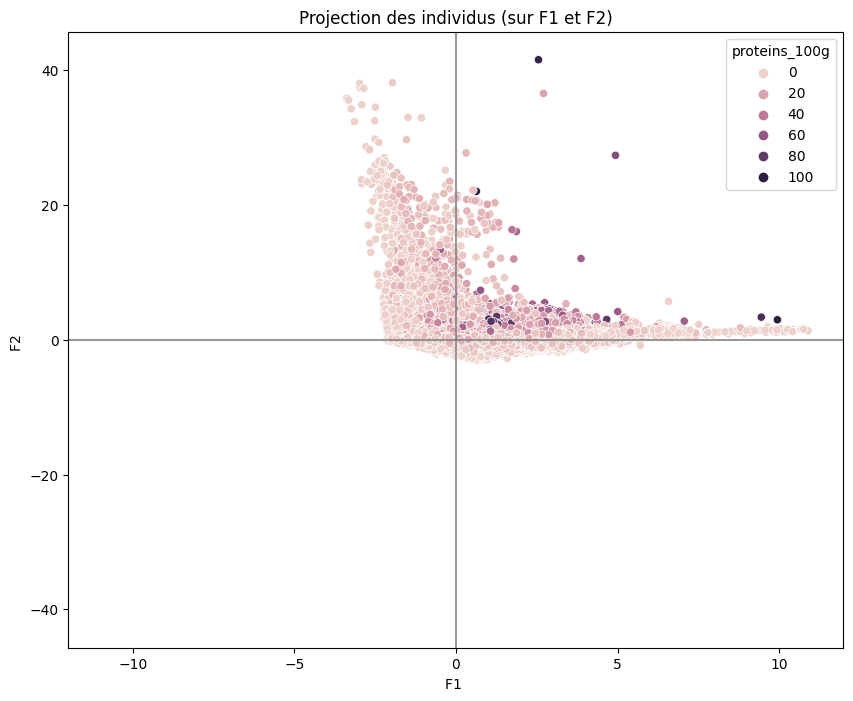

In [160]:
x_y = [0,1]
display_factorial_planes(X_proj, x_y, clusters=df['proteins_100g'])